In [4]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import pickle

In [5]:
#load dataset
df= pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

In [6]:
#displaying few rows of dataframe
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
# Ensure that the 'Classes' column is treated as string
df['Classes'] = df['Classes'].astype(str).str.strip().replace({'not fire': 0, 'fire': 1})

# Encode 'Region' column
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [8]:
#checking missing values
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [9]:
#checking data types
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [10]:
#generate summary
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [11]:
# Define features and target variable
features = df.drop('FWI', axis=1)
target = df['FWI']

In [12]:
#standardizing the featurs
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
# Initializing the linear regression model
linear_model = LinearRegression()

# Initializing RFE with the linear model to select top features
rfe = RFE(estimator=linear_model, n_features_to_select=10)
rfe.fit(features_scaled, target)

# Take the selected features
selected_features = features.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

# Transforming the selected features  into a DataFrame
features_selected_df = pd.DataFrame(rfe.transform(features_scaled), columns=selected_features)

# show the first few rows of the selected features
print(features_selected_df.head())

Selected features using RFE: Index(['day', 'month', 'RH', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes',
       'Region'],
      dtype='object')
        day     month        RH      FFMC       DMC        DC       ISI  \
0 -1.672796 -1.350168 -0.340673 -0.847927 -0.912120 -0.879401 -0.830356   
1 -1.559473 -1.350168 -0.070359 -0.938709 -0.855520 -0.879401 -0.902720   
2 -1.446150 -1.350168  1.348788 -2.146802 -0.984891 -0.889913 -1.071571   
3 -1.332827 -1.350168  1.821837 -3.438694 -1.081920 -0.894117 -1.143935   
4 -1.219504 -1.350168  1.010896 -0.910776 -0.944463 -0.740651 -0.854477   

        BUI   Classes    Region  
0 -0.936012 -1.136861 -0.995893  
1 -0.900798 -1.136861 -0.995893  
2 -0.985310 -1.136861 -0.995893  
3 -1.055737 -1.136861 -0.995893  
4 -0.900798 -1.136861 -0.995893  


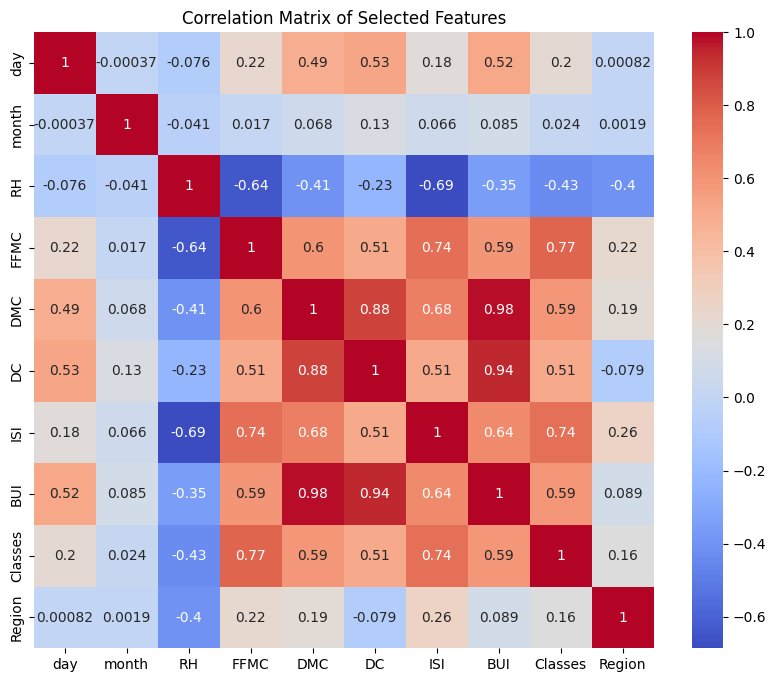

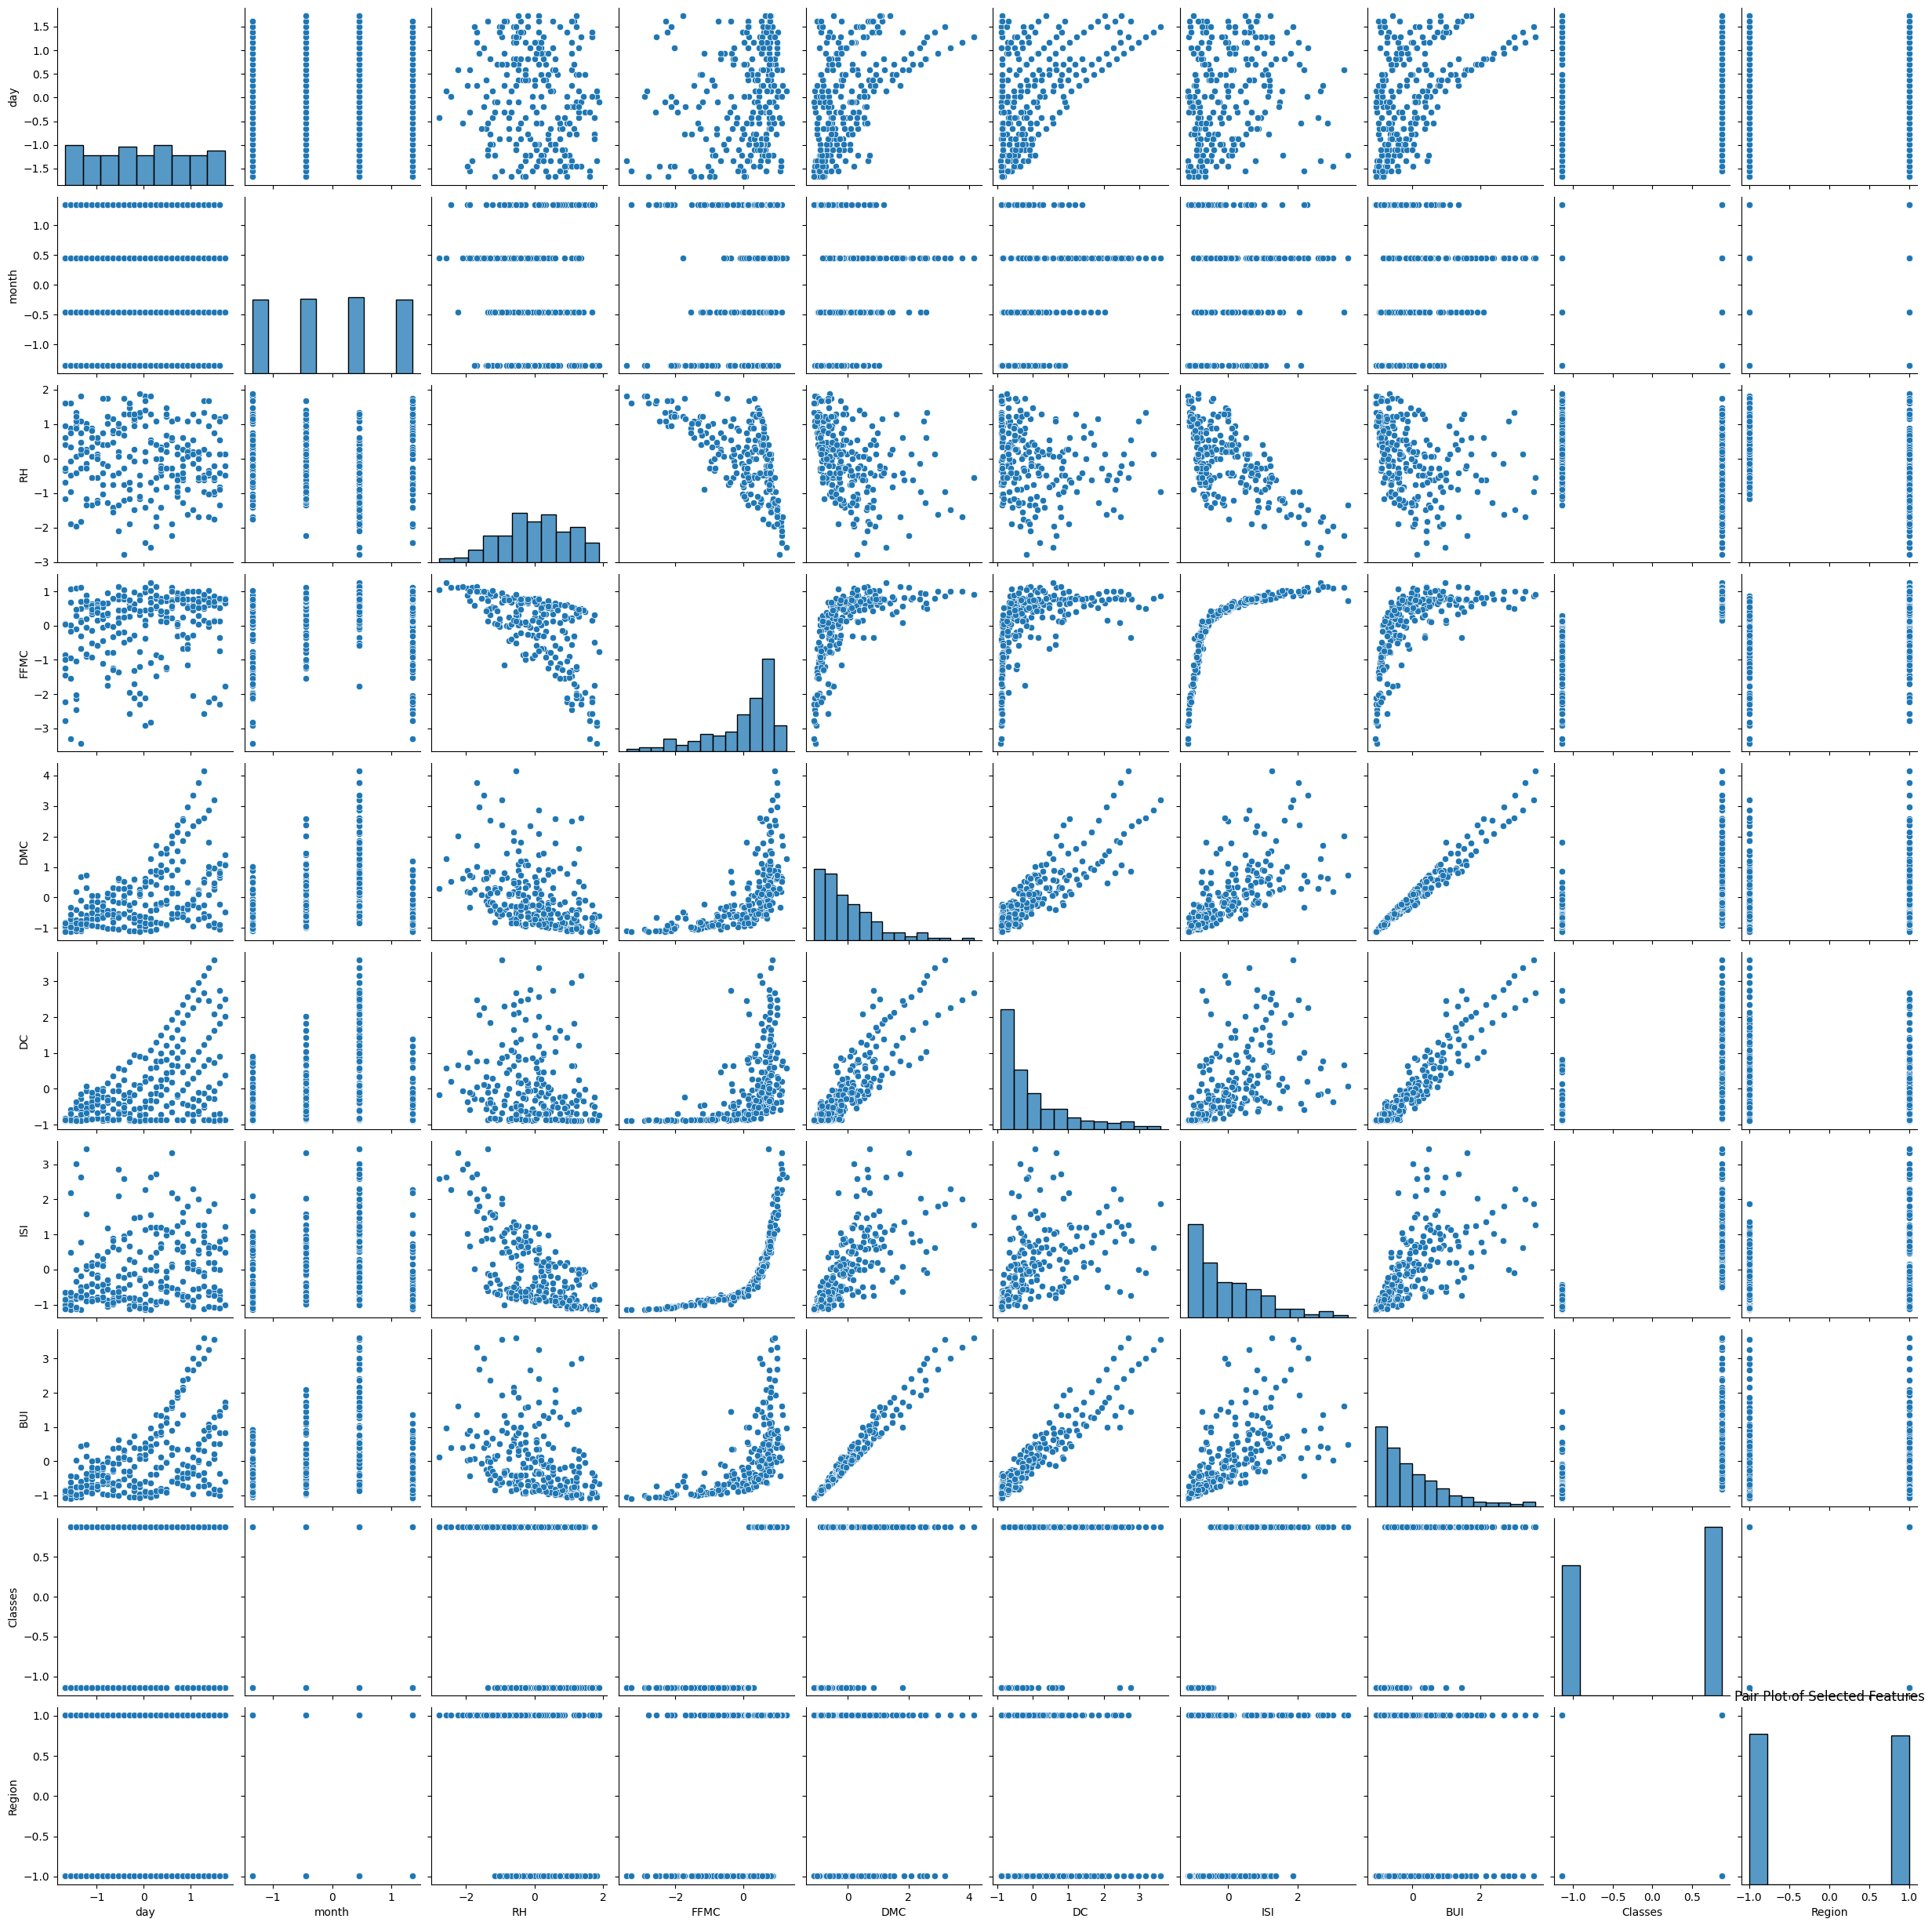

In [14]:
# Data Visualization
plt.figure(figsize=(10, 8))
correlation_matrix = features_selected_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

sns.pairplot(features_selected_df)
plt.title('Pair Plot of Selected Features')
plt.show()

In [15]:

# Add 'FWI' column back to the selected features DataFrame
features_selected_df['FWI'] = target.values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_selected_df.drop('FWI', axis=1), features_selected_df['FWI'], test_size=0.2, random_state=42)

# Multiple Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Multiple Linear Regression - MSE:", mse)
print("Multiple Linear Regression - R2 Score:", r2)

Multiple Linear Regression - MSE: 0.29708395922452724
Multiple Linear Regression - R2 Score: 0.9901979732163781


In [16]:
# Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression - MSE:", mse_poly)
print("Polynomial Regression - R2 Score:", r2_poly)

Polynomial Regression - MSE: 9.00052080954867
Polynomial Regression - R2 Score: 0.7030356459768824


In [17]:
# Lasso Regression
lasso = Lasso()
params_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_reg = GridSearchCV(lasso, params_lasso, cv=5)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - MSE:", mse_lasso)
print("Lasso Regression - R2 Score:", r2_lasso)

Lasso Regression - MSE: 0.5327005091645706
Lasso Regression - R2 Score: 0.9824240101279456


In [18]:
# Ridge Regression
ridge = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_reg = GridSearchCV(ridge, params_ridge, cv=5)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - R2 Score:", r2_ridge)

Ridge Regression - MSE: 0.8238708327913762
Ridge Regression - R2 Score: 0.9728170986062475


In [19]:
# Cross-validation for linear regression
cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5)
print("Linear Regression CV Scores:", cv_scores_linear)

# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)
print("Best Ridge Parameters:", grid_search_ridge.best_params_)

Linear Regression CV Scores: [0.98838057 0.98064217 0.84746023 0.98136191 0.97812001]
Best Ridge Parameters: {'alpha': 10.0}


In [23]:
# Save all models
models = {'Linear Regression': linear_reg,
          'Polynomial Regression': poly_reg,
          'Lasso Regression': lasso_reg,
          'Ridge Regression': ridge_reg}

for model_name, model in models.items():
    with open(f'best_model_{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)

# Load and test all models
for model_name in models:
    with open(f'best_model_{model_name}.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    # Predict on test set with loaded model
    y_pred_loaded = loaded_model.predict(X_test)
    mse_loaded = mean_squared_error(y_test, y_pred_loaded)
    r2_loaded = r2_score(y_test, y_pred_loaded)

    # Print results
    print(f"{model_name} - MSE:", mse_loaded)
    print(f"{model_name} - R2 Score:", r2_loaded)
    print()


Linear Regression - MSE: 0.29708395922452724
Linear Regression - R2 Score: 0.9901979732163781

Polynomial Regression - MSE: 9.00052080954867
Polynomial Regression - R2 Score: 0.7030356459768824

Lasso Regression - MSE: 0.5327005091645706
Lasso Regression - R2 Score: 0.9824240101279456

Ridge Regression - MSE: 0.8238708327913762
Ridge Regression - R2 Score: 0.9728170986062475



While all models perform reasonably well, the linear regression model stands out as the best performer in terms of accuracy and explanatory power.
